<a href="https://colab.research.google.com/github/Bhargavikeshoju/Malaria-Detection/blob/main/MalariaDetectionVGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19   #transfer learning model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [256, 256]

train_path = '/content/drive/MyDrive/Dataset/Train'
valid_path = '/content/drive/MyDrive/Dataset/Test'

In [ ]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:

# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset/Train/Infected',
 '/content/drive/MyDrive/Dataset/Train/Uninfected']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 206 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 154 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5, verbose=True)

In [ ]:
len(training_set)
len(test_set)

5

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  #callbacks=[early_stop],verbose=True
)

<ipython-input-16-ae9050d0d014>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
7/7 [==============================] - 423s 64s/step - loss: 1.0258 - accuracy: 0.6796 - val_loss: 0.4841 - val_accuracy: 0.8312
Epoch 2/10
7/7 [==============================] - 408s 62s/step - loss: 0.3236 - accuracy: 0.9369 - val_loss: 0.6387 - val_accuracy: 0.8701
Epoch 3/10
7/7 [==============================] - 404s 62s/step - loss: 0.2710 - accuracy: 0.9126 - val_loss: 0.2615 - val_accuracy: 0.9026
Epoch 4/10
7/7 [==============================] - 409s 61s/step - loss: 0.0971 - accuracy: 0.9612 - val_loss: 0.2713 - val_accuracy: 0.8961
Epoch 5/10
7/7 [==============================] - 411s 63s/step - loss: 0.0621 - accuracy: 0.9806 - val_loss: 0.0538 - val_accuracy: 0.9675
Epoch 6/10
7/7 [==============================] - 407s 62s/step - loss: 0.0268 - accuracy: 0.9854 - val_loss: 0.0346 - val_accuracy: 0.9935
Epoch 7/10
7/7 [==============================] - 407s 61s/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0377 - val_accuracy: 0.9870
Epoch 8/10
7/7 [====

In [ ]:
y_pred = model.predict(test_set)

5/5 [==============================] - 161s 31s/step


1/1 [==============================] - 1s 786ms/step
[[1.0000000e+00 1.0987799e-37]]
0
Infected


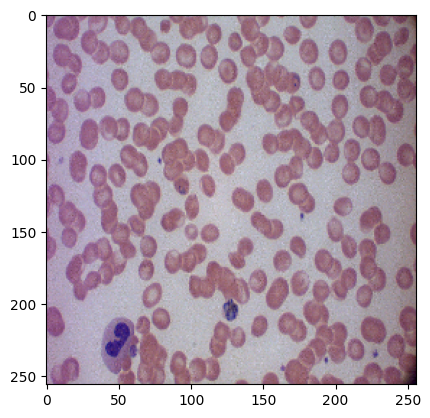

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Dataset/Test/Infected/Copy of 1305121398-0001-R_S.png', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)
if index1==0:
  print("Infected")
elif index1==1:
  print("Uninfected")

1/1 [==============================] - 1s 1s/step
[[1.4434877e-29 1.0000000e+00]]
1
Uninfected


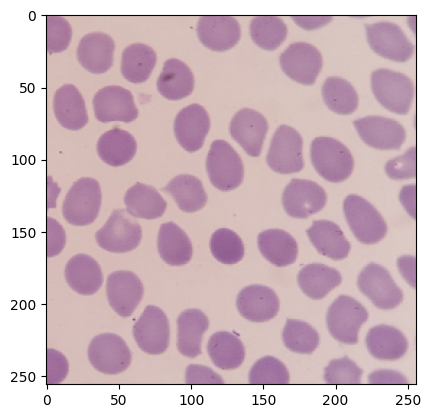

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/Copy of IMG_20150611_104824.jpg', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)
if index1==0:
  print("Infected")
elif index1==1:
  print("Uninfected")

1/1 [==============================] - 1s 1s/step
[[2.1254946e-04 9.9978751e-01]]
1
Uninfected


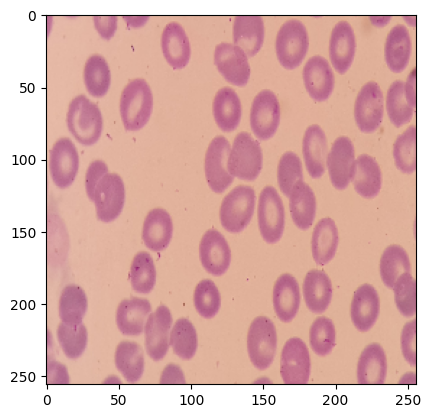

1/1 [==============================] - 1s 839ms/step
[[0.00127911 0.9987208 ]]
1
Uninfected


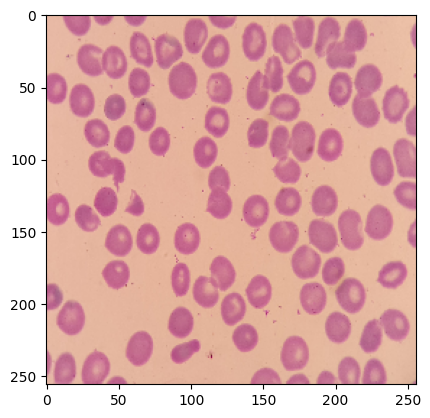

In [ ]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/Copy of IMG_20150621_112023.jpg', target_size=(256,256))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
img_test = np.expand_dims(x, axis=0)

classes = model.predict(img_test)

print(classes)
values = classes[0]
index1 = np.argmax(values)
print(index1)
if index1==0:
  print("Infected")
elif index1==1:
  print("Uninfected")

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Dataset/model2_vgg19.h5')

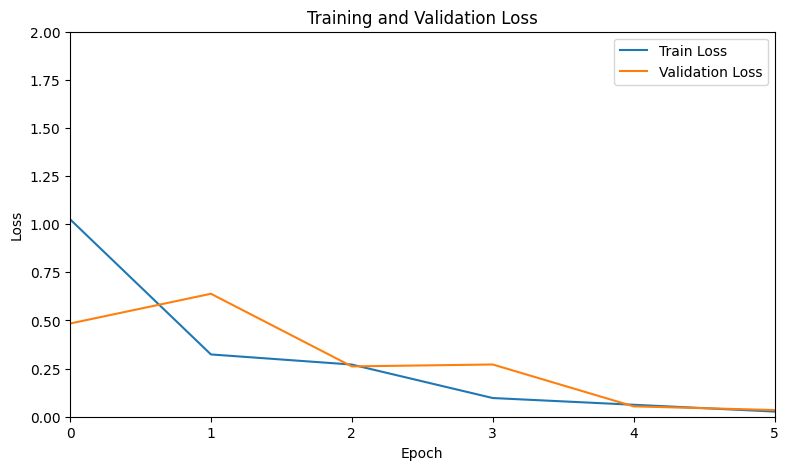

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(r.history['loss'], label="Train Loss")
plt.plot(r.history['val_loss'], label="Validation Loss")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0.0, 2.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


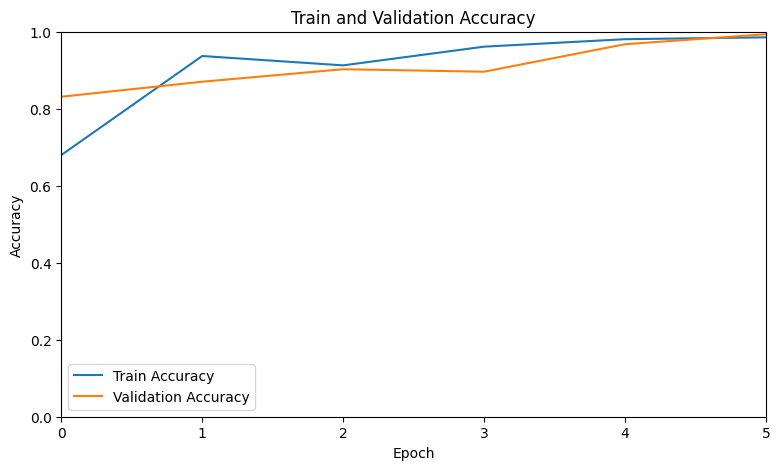

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 2)  # Changed subplot position to (1, 2, 2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(r.history['accuracy'], label="Train Accuracy")
plt.plot(r.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 5)  # Adjust the x-axis limits as needed
plt.ylim(0, 1.0)  # Adjust the y-axis limits as needed
plt.legend()
plt.show()


In [ ]:
# Importing all important libraries
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import seaborn as sns           # for working with maps
import torch                    # Pytorch module
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
import tensorflow as ts
from  tensorflow import keras
import itertools
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [ ]:
# Create a rescaling layer in a Keras model
rescale=keras.layers.Rescaling(scale=1.0/255)

In [ ]:
# Create TensorFlow tf.data.Dataset objects from image directories for training and validation data in Keras
# Images are loaded with the specified image size of (256, 256), and the function image_dataset_from_directory assigns labels based on subdirectory names
training_data =keras.utils.image_dataset_from_directory(train_path , image_size=(256, 256))
validation_data = keras.utils.image_dataset_from_directory(valid_path, image_size=(256, 256))

Found 100 files belonging to 2 classes.
Found 92 files belonging to 2 classes.


In [ ]:
validation_data = keras.utils.image_dataset_from_directory(valid_path, image_size=(256, 256))

Found 92 files belonging to 2 classes.


In [ ]:
valid_gen  = validation_data.map(lambda image,label:(rescale(image),label))

In [ ]:
# Obtain the labels and predictions for the validation data.
labels = []
predictions = []
for x,y in valid_gen:
    labels.append(list(y.numpy()))
    predictions.append(ts.argmax(model.predict(x),1).numpy())

1/1 [==============================] - 26s 26s/step


In [ ]:
# Flatten the nested lists of predictions and labels
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
# Print various evaluation metrics based on the model's performance
print("Train Accuracy  : {:.2f} %".format(r.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.03 %
Test Accuracy   : 100.00 %
Precision Score : 100.00 %
Recall Score    : 100.00 %


<Figure size 500x500 with 0 Axes>

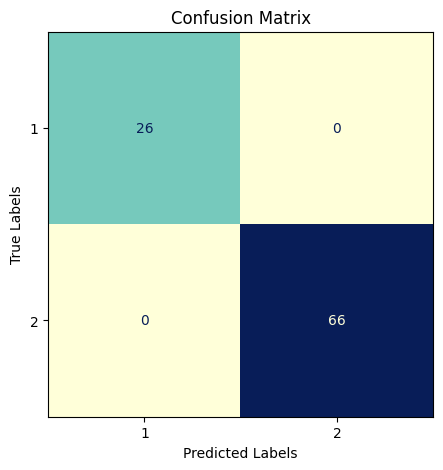

In [ ]:
# Plot a confusion matrix based on the true labels and predicted labels
plt.figure(figsize= (5,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(1,3)))
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()